In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression as LR
import matplotlib.pyplot as plt

In [147]:
X = np.linspace(0, 10, 30).reshape(30,1)
Y = []
for x in X:
    y = x**8 - 45*x**7 + 843*x**6 - 8489*x**5 + 49449*x**4 - 166695*x**3 + 307657*x**2 - 275331*x + 92610
    Y.append(y/10000. + 3)
Y = np.array(Y)

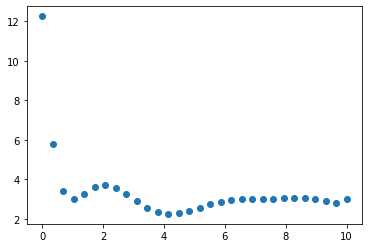

In [148]:
plt.scatter(X,Y)

In [260]:
reg = LR()

In [261]:
reg.fit(X,Y)

LinearRegression()

In [262]:
a,b = reg.coef_[0][0], reg.intercept_[0]

In [263]:
Y_ = a*X + b

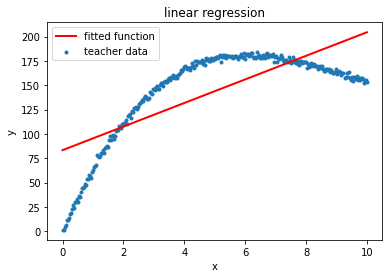

In [264]:
plt.scatter(X,Y, marker='.', label='teacher data')
plt.plot(X, Y_, label='fitted function', linewidth = 2.0, color='red')
plt.title('linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [265]:
reg = LR()
reg.fit(X[:50],Y[:50])
a,b = reg.coef_[0][0], reg.intercept_[0]
Y_ = a*X + b

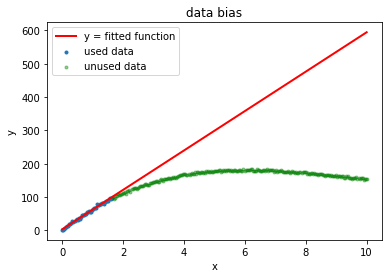

In [266]:
plt.scatter(X[:50],Y[:50], marker='.', label='used data')
plt.scatter(X[50:],Y[50:], marker='.', label='unused data', color='green', alpha=.4)
plt.plot(X, Y_, label='y = fitted function', linewidth = 2.0, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('data bias')
plt.legend()

In [103]:
def func(X,a,b,c,d,e,f,g):
    return a*X**6 + b*X**5 + c*X**4 + d*X**3 + e*X**2 + f*X + g

In [104]:
from scipy.optimize import curve_fit  

In [149]:
params = curve_fit(func, X.flatten(), Y.flatten())[0]
X_ = np.linspace(0, 10, 300)
Y_ = func(X_, params[0], params[1], params[2], params[3], params[4], params[5], params[6])

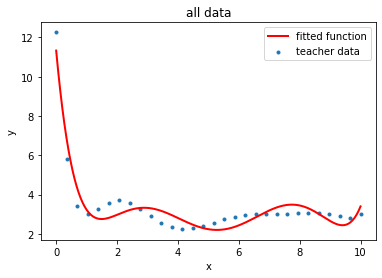

In [150]:
plt.scatter(X,Y, marker='.', label='teacher data')
plt.plot(X_, Y_, label='fitted function', linewidth = 2.0, color='red')
plt.title('all data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [156]:
X_ = np.linspace(0,10,300)
params = curve_fit(func, X[3:13].flatten(), Y[3:13].flatten())[0]
Y_ = func(X_, params[0], params[1], params[2], params[3], params[4], params[5], params[6])
params = curve_fit(func, X.flatten(), Y.flatten())[0]
Y__ = func(X_, params[0], params[1], params[2], params[3], params[4], params[5], params[6])

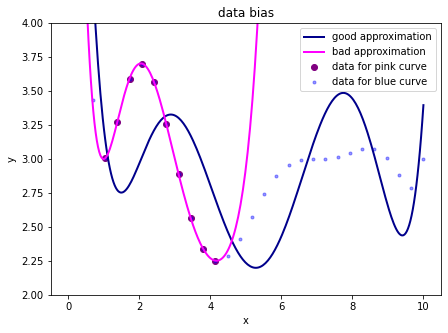

In [159]:
plt.figure(figsize=(7,5))

#plt.scatter(np.vstack((X[:90],X[120:])),np.vstack((Y[:90],Y[120:])), marker='.', label='unused data', color='gray', alpha=.4)
plt.scatter(X[3:13],Y[3:13], marker='o', label='data for pink curve', color='purple')
plt.scatter(X,Y, marker='.', label='data for blue curve', color='blue', alpha=.4)

plt.plot(X_, Y__, label='good approximation', linewidth = 2.0, color='darkblue')
plt.plot(X_, Y_, label='bad approximation', linewidth = 2.0, color='magenta')
plt.title('data bias')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(2,4)
#plt.xlim(2.5,5.5)
plt.legend()

In [49]:
params = curve_fit(func, X[90:120].flatten(), Y[90:120].flatten())[0]
Y_ = func(X, params[0], params[1], params[2], params[3], params[4], params[5])
params = curve_fit(func, X[90:110].flatten(), Y[90:110].flatten())[0]
Y__ = func(X, params[0], params[1], params[2], params[3], params[4], params[5])

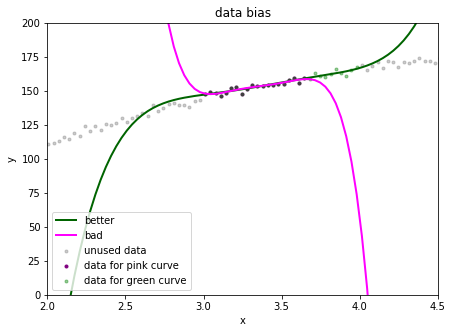

In [52]:
plt.figure(figsize=(7,5))

plt.scatter(np.vstack((X[:90],X[120:])),np.vstack((Y[:90],Y[120:])), marker='.', label='unused data', color='gray', alpha=.4)
plt.scatter(X[90:110],Y[90:110], marker='.', label='data for pink curve', color='purple')
plt.scatter(X[90:120],Y[90:120], marker='.', label='data for green curve', color='green', alpha=.4)

plt.plot(X, Y_, label='better', linewidth = 2.0, color='darkgreen')
plt.plot(X, Y__, label='bad', linewidth = 2.0, color='magenta')
plt.title('data bias')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(0,200)
plt.xlim(2,4.5)
plt.legend(loc='lower left')